In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
df_input = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3,4])

In [6]:
df_output = pd. read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[5,6])

In [7]:
df_input.shape

(85096, 4)

In [8]:
df_output.shape

(85096, 2)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [10]:
print(x_train.shape,x_test.shape)

(76586, 4) (8510, 4)


In [11]:
x_train

,x座標,y座標,z座標,V[V]
76695,-0.597975,1.384978,2.025275,1.264911
58668,0.157043,1.384978,-0.175997,0.632456
13136,-0.122811,1.908395,2.218961,-1.264911
72420,-1.417443,-0.769531,-0.553156,1.264911
43713,1.065470,-1.282510,0.106872,0.000000
...,...,...,...,...
21243,-0.048337,-1.907057,0.106872,-0.948683
45891,0.514740,-0.051362,0.106872,0.000000
42613,-1.417443,1.333680,0.106872,0.000000
43567,0.888119,0.205128,0.106872,0.000000


In [12]:
y_train

,i[A/m^2],c[mol/m^3]
76695,-0.478544,0.938510
58668,-0.478544,0.520132
13136,-0.478544,0.033019
72420,-0.203969,0.731965
43713,-0.478544,0.455846
...,...,...
21243,-0.478544,1.290436
45891,-0.478544,0.657754
42613,-0.478544,-0.286725
43567,-0.478544,0.172121


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(4,), activation='tanh'))  
model.add(Dense(units=10, activation='tanh'))  #xとyが-1～1なのでtanh
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=2, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_squared_error',    #出力は連続値なので平均二乗誤差
              optimizer='adam',             #とりあえずadamで
              metrics=['mse'])

In [14]:
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mse',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001)
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mse",
                                              patience=50,
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])

Epoch 1/20000
383/383 [==============================] - 4s 6ms/step - loss: 0.4087 - mse: 0.4087 - val_loss: 0.2017 - val_mse: 0.2017 - lr: 0.0010
Epoch 2/20000
383/383 [==============================] - 2s 5ms/step - loss: 0.1638 - mse: 0.1638 - val_loss: 0.1259 - val_mse: 0.1259 - lr: 0.0010
Epoch 3/20000
383/383 [==============================] - 2s 5ms/step - loss: 0.1085 - mse: 0.1085 - val_loss: 0.0864 - val_mse: 0.0864 - lr: 0.0010
Epoch 4/20000
383/383 [==============================] - 2s 5ms/step - loss: 0.0803 - mse: 0.0803 - val_loss: 0.0702 - val_mse: 0.0702 - lr: 0.0010
Epoch 5/20000
383/383 [==============================] - 2s 5ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0626 - val_mse: 0.0626 - lr: 0.0010
Epoch 6/20000
383/383 [==============================] - 2s 5ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0541 - val_mse: 0.0541 - lr: 0.0010
Epoch 7/20000
383/383 [==============================] - 2s 5ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.

Epoch 114/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 115/20000
76586/76586 [==============================] - 1s 11us/sample - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 116/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 117/20000
76586/76586 [==============================] - 1s 10us/sample - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0129 - val_mse: 0.0129 0.0131 - mse: 0.013
Epoch 118/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 119/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 120/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0133 - mse: 0.0133 - val_loss: 0.

76586/76586 [==============================] - 1s 9us/sample - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 171/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 172/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 173/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 174/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 175/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 176/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 177/20000

76586/76586 [==============================] - 1s 8us/sample - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0119 - val_mse: 0.0119 loss: 0.0111 - mse: 0.0
Epoch 228/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 229/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 230/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 231/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 232/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 233/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0110 - val_mse

76586/76586 [==============================] - 1s 10us/sample - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 285/20000
76586/76586 [==============================] - 1s 10us/sample - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 286/20000
76586/76586 [==============================] - 1s 10us/sample - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 287/20000
76586/76586 [==============================] - 1s 12us/sample - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 288/20000
76586/76586 [==============================] - 1s 10us/sample - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 289/20000
76586/76586 [==============================] - 1s 10us/sample - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 290/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 291

Epoch 341/20000
76586/76586 [==============================] - 1s 11us/sample - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 342/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 343/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 344/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 345/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 346/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 347/20000
76586/76586 [==============================] - 1s 10us/sample - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0100 - val_mse: 0.01

76586/76586 [==============================] - 1s 12us/sample - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 398/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 399/20000
76586/76586 [==============================] - 1s 10us/sample - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 400/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 401/20000
76586/76586 [==============================] - 1s 8us/sample - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 402/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 403/20000
76586/76586 [==============================] - 1s 9us/sample - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 404/200

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse', 'lr'])

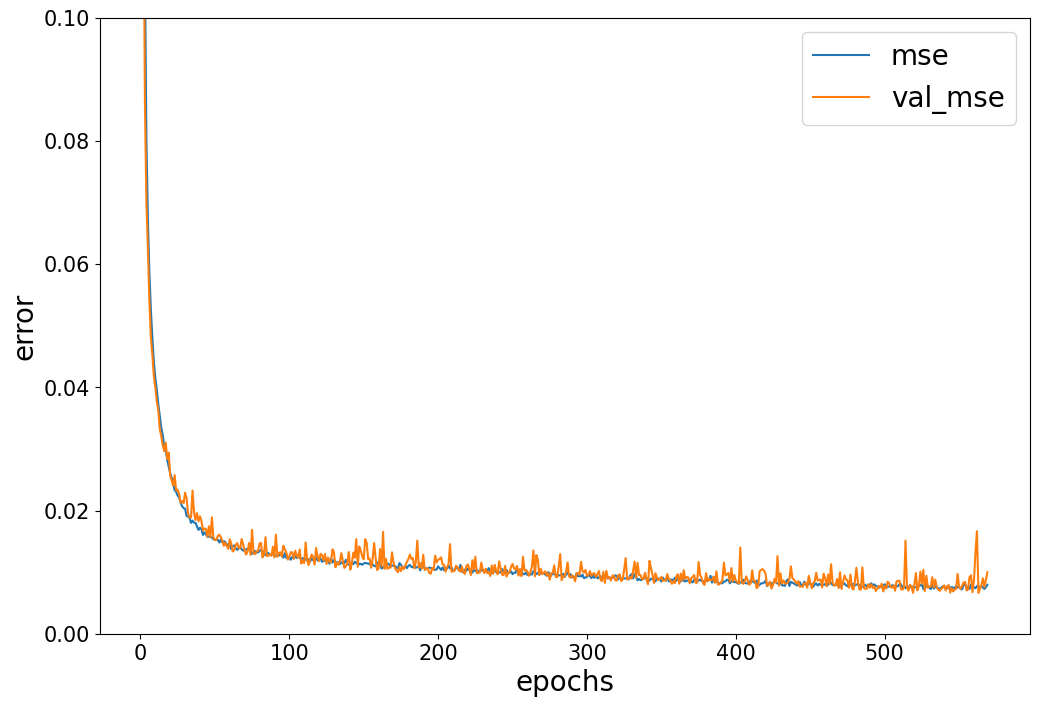

In [16]:
mse = history_dict['mse']
val_mse = history_dict['val_mse']
epochs = range(1, len(mse) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mse, label='mse')
plt.plot(epochs, val_mse, label='val_mse')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,0.1))
plt.legend(loc = 'best',fontsize=20)
plt.savefig('mse_transition.png')
plt.show()

In [17]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [18]:
model.save('i_predict CD_3D+O2dist')

INFO:tensorflow:Assets written to: i_predict CD_3D+O2dist\assets
